# Tutorial 11: Clustering

__The goal of this assignment is to implement your own version of the k-means algorithm.__

First, you must create 5 intermediate functions to help you divide and implement the algorithm.

At the end of the notebook, the algorithm should achieve a 100% score on the given dataset.

__Grade scale__: 20 points
- __correct function__: 2 points
- __correct given result__: 4 points
- __correct hidden result__: 6 points

__Further documentations__:
* https://learnxinyminutes.com/docs/python/
* https://en.wikipedia.org/wiki/K-means_clustering
* http://stanford.edu/~cpiech/cs221/handouts/kmeans.html

# Core

In [1]:
# to display plots
%matplotlib inline

import math

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets.samples_generator import make_blobs

/home/dama/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# generate 100 data points that have 2 features, then divide them into 3 clusters
# we shuffle the point in a deterministic way to have the same version on our computers
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, shuffle=True, random_state=100)

In [3]:
# 5 data points
# col: features
# row: points
X[:5]

array([[  0.33681846,  -3.40287961],
       [ -9.48324266,  -8.66266052],
       [ -1.93336328,   5.70953908],
       [-10.03182406,  -5.57834393],
       [  0.54186078,  -4.37693628]])

In [4]:
# data point labels
# 3 clusters: 0, 1, 2
y

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

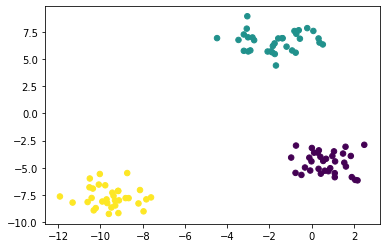

In [6]:
# draw a scatter plot of the points
# X[:, 0]: all points, 1st dimension
# X[:, 1]: all points, 2nd dimension
# c: color of the points (cluster label)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30);

# Example

In [7]:
# we use the k-means implementation of sklearn
# to demonstrate its usage on our dataset
# here, we create and fit a new model  
model = KMeans(n_clusters=3).fit(X)

# collect the results
labels = model.labels_

labels

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0], dtype=int32)

In [8]:
# compare the resulting labels with the true labels
# the function should give a rand score of 100%
score = adjusted_rand_score(y, labels)
print("Score: {:0.4%}".format(score))

Score: 100.0000%


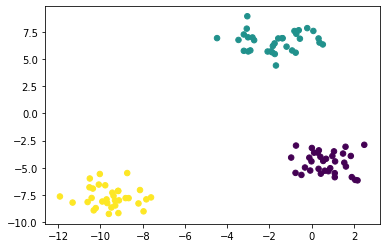

In [9]:
# draw the proposed labels on a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30);

# Functions

In [10]:
def distance(a, b):
    """Compute the euclidean distance between 2 points with n dimensions."""    
    ### BEGIN SOLUTION
    d = 0
    for x, y in zip(a, b):
        d += (x-y)**2
    d = math.sqrt(d)
    return d
    ### END SOLUTION

In [11]:
def initialize(points, k):
    """Select the k first points as the initial cluster centers."""    
    ### BEGIN SOLUTION
    centers = []
    centers = points[:k]
    return centers
    ### END SOLUTION

In [12]:
def reassign(points, centers, distance=distance):
    """Assign each point to its closest centers and return the center index.""" 
    ### BEGIN SOLUTION
    labels = []
    def closest(centers, point):
        return min(centers, key=lambda center: distance(point, center))
    
    labels = [centers.index(closest(centers, point)) for point in points]
    return labels
    ### END SOLUTION

In [13]:
def recompute(points, labels):
    """Compute the coordinates of each center based their labels."""
    ### BEGIN SOLUTION
    centers = []
    clusters = []
    transpose = lambda xs: zip(*xs)
    mean = lambda xs: sum(xs) / len(xs)
    coordinate = lambda matrix: [mean(col) for col in transpose(matrix)]
    
    # step 1: cluster points based on labels
    clusters = [[] for label in set(labels)]
    for point, label in zip(points, labels):
        clusters[label].append(point)
        
    # step 2: compute the mean for each cluster
    centers = [coordinate(cluster) for cluster in clusters]
    return centers
    ### END SOLUTION

In [14]:
def converged(current, proposed):
    """Test that current and proposed centers have converged."""
    ### BEGIN SOLUTION
    return current == proposed
    ### END SOLUTION

# Algorithm

In [15]:
def kmeans(points, k, distance=distance):
    """Cluster points into k clusters based on distance."""
    ### BEGIN SOLUTION
    centers = initialize(points, k)
    
    while True:
        labels = reassign(points, centers)
        proposed = recompute(points, labels)
        
        if converged(centers, proposed):
            return labels
        
        centers = proposed
    ### END SOLUTION

# Test Your Algorithm

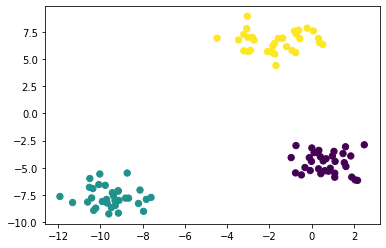

In [26]:
### BEGIN SOLUTION
KMeans = None

k=3
labels = kmeans(X.tolist(), k)

# cluster points should have the same color
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)
### END SOLUTION